In [1]:
import torch
import torch.nn as nn
import random
import time
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
from dna2vec.dna2vec.multi_k_model import MultiKModel

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [69]:
import random
def make_reads(file_name, read_length = 70, num_reads = 10000):
    ''' Parse FASTA into a dictionary of reads '''
    with open(file_name) as my_file:
        input_lines = my_file.readlines()

    sequence = ''
    for line in input_lines:
        if line.startswith('>'):
            continue
        if 'N' in line:
            continue
        sequence += line.rstrip()
    #print(len(sequence))
    
    reads = []
    index = random.sample(range(0, len(sequence)-read_length), num_reads)
    for i in index:
        reads.append(sequence[i:i+read_length])

    return reads

In [70]:
category_lines = {}
ec_file = 'e_coli.fna'
sm_file = 's_maltophilia.fna'
ax_file = 'a_xylosoxidans.fna'
da_file = 'd_acidovorans.fna'
pa_file = 'p_acnes.fna'
se_file = 's_epidermidis.fna'
ab_file = 'a_baumannii.fna'
sc_file = 's_cerevisiae.fna'
wa_file = 'w_anomalus.fna'
mr_file = 'm_restricta.fna'
pn_file = 'p_notatum.fna'
category_lines['E. coli'] = make_reads(ec_file)
category_lines['S. maltophilia'] = make_reads(sm_file)
category_lines['A. xylosoxidans'] = make_reads(ax_file)
category_lines['D. acidovorans'] = make_reads(da_file)
category_lines['P. acnes'] = make_reads(pa_file)
category_lines['S. epidermidis'] = make_reads(se_file)
category_lines['A. baumannii'] = make_reads(ab_file)
category_lines['S. cerevisiae'] = make_reads(sc_file)
category_lines['W. anomalus'] = make_reads(wa_file)
category_lines['M. restricta'] = make_reads(mr_file)
category_lines['P. notatum'] = make_reads(pn_file)

In [4]:
# DNA embedding
filepath = 'dna2vec/pretrained/dna2vec-20161219-0153-k3to8-100d-10c-29320Mbp-sliding-Xat.w2v'
mk_model = MultiKModel(filepath)

In [29]:
mk_model.vector('ATG')

array([-0.012206  ,  0.39779699,  0.097603  , -0.058754  ,  0.072627  ,
       -0.247025  , -0.110688  ,  0.101675  ,  0.101105  , -0.220668  ,
       -0.127433  , -0.046099  , -0.31382701, -0.371115  , -0.36859399,
       -0.072688  , -0.027233  ,  0.045963  , -0.093297  ,  0.190667  ,
        0.158722  , -0.590361  , -0.082308  ,  0.056334  ,  0.107266  ,
       -0.120519  , -0.136144  ,  0.28646001,  0.277596  , -0.060073  ,
        0.23791701, -0.23421399,  0.15896299,  0.058911  ,  0.024735  ,
        0.176507  ,  0.246501  ,  0.462387  , -0.064701  ,  0.37303001,
        0.30354899, -0.182322  ,  0.21007399, -0.55129999,  0.169237  ,
       -0.004276  , -0.151614  , -0.34891501, -0.123048  , -0.007773  ,
       -0.334052  ,  0.130134  ,  0.158041  , -0.037027  , -0.127519  ,
       -0.039673  ,  0.064268  , -0.021035  , -0.71886897, -0.20040099,
       -0.19578899, -0.17915501,  0.119458  ,  0.096051  , -0.043424  ,
       -0.090991  ,  0.149406  ,  0.32438901,  0.114336  , -0.08

In [18]:
len(mk_model.vector('ATG'))

100

In [13]:
mk_model.cosine_distance('ATAGCAAA', 'ATAGAAAA')

0.57358921

In [68]:
print(mk_model.cosine_distance('ATAGCAAA', 'ATAGAAAA'))

0.573589


In [15]:
all_categories = ['E. coli', 
                  'S. maltophilia',
                  'A. xylosoxidans',
                  'D. acidovorans',
                  'P. acnes',
                  'S. epidermidis',
                  'A. baumannii',
                  'S. cerevisiae',
                  'W. anomalus',
                  'M. restricta',
                  'P. notatum']
n_categories = 11

In [71]:
read_length = 70
k = 3
n_kmers = read_length - k + 1

In [57]:
# Just for demonstration, turn a k-mer into a <1 x 100> Tensor
def kmerToTensor(kmer):
    tensor = torch.zeros(1, 100)
    tensor[0] = torch.FloatTensor(mk_model.vector(kmer.upper()))
    return tensor

# Turn a line into a <n_kmers x 1 x 100> Tensor
def lineToTensor(line):
    tensor = torch.zeros(len(line)-k+1, 1, 100)
    for i in range(len(line)-k+1):
        tensor[i][0] = torch.FloatTensor(mk_model.vector(line[i:i+k].upper()))
    return tensor

In [38]:
kmerToTensor('TGC')

tensor([[-0.0263,  0.3346,  0.0421, -0.4852, -0.3486,  0.0596, -0.2218, -0.0821,
          0.3632, -0.3129, -0.1257,  0.1770, -0.1640,  0.5042, -0.6186,  0.1687,
          0.0502,  0.0442,  0.0259,  0.0926, -0.0682,  0.2653, -0.3156,  0.0054,
         -0.0094, -0.4049, -0.1074,  0.0319,  0.3784, -0.1971,  0.0526, -0.2132,
          0.1042,  0.1734,  0.5441,  0.1599,  0.1425,  0.2424,  0.1978, -0.0040,
          0.2446, -0.1251,  0.3158, -0.3836, -0.3209,  0.2387, -0.0891, -0.0499,
         -0.1285,  0.4144, -0.1324,  0.2065, -0.1754, -0.0790, -0.0511, -0.2148,
         -0.0081, -0.3731,  0.0013, -0.1070,  0.2805,  0.2030, -0.2843,  0.0688,
          0.2812,  0.2996,  0.3316,  0.1317, -0.1040, -0.6443, -0.1928, -0.2444,
         -0.1562,  0.1373, -0.0198, -0.2723, -0.0805, -0.0024,  0.1601,  0.3706,
         -0.3193, -0.0092,  0.0453,  0.1950, -0.1337,  0.0388,  0.2082, -0.2394,
          0.1386, -0.2158, -0.0946,  0.2139, -0.1611, -0.1513,  0.3931,  0.0169,
          0.2078, -0.0532, -

In [39]:
lineToTensor('ATGCA').size()

torch.Size([3, 1, 100])

In [40]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [72]:
n_hidden = 125
n_dimensions = 100
rnn = RNN(n_dimensions, n_hidden, n_categories)

In [107]:
input = lineToTensor('ATG')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)

In [108]:
output

tensor([[-2.3618, -2.0688, -2.4957, -2.1780, -2.5339, -2.3869, -2.2128, -2.6079,
         -2.4675, -2.7190, -2.5431]], grad_fn=<LogSoftmaxBackward>)

In [42]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

In [43]:
import random

def randomChoice(l, start = 0, end = 0):
    l = l[:start] + l[end:]
    return l[random.randint(0, len(l)-1)]

def randomTrainingExample(start, end):
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category], start, end)
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

In [48]:
for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample(0, 9999)
    print('category =', category, '/ line =', line)

category = M. restricta / line = ATAGGCTTGA
category = M. restricta / line = ATAGGCTTGA
category = S. maltophilia / line = CGCTGGGCGC
category = A. baumannii / line = TAACAAAGCC
category = D. acidovorans / line = GACCAAAGCA
category = S. maltophilia / line = CGCTGGGCGC
category = S. epidermidis / line = TATACAAGCA
category = A. xylosoxidans / line = CGCCTCGAGC
category = M. restricta / line = ATAGGCTTGA
category = D. acidovorans / line = GACCAAAGCA


In [51]:
criterion = nn.NLLLoss()

In [73]:
rnn

RNN(
  (i2h): Linear(in_features=225, out_features=125, bias=True)
  (i2o): Linear(in_features=225, out_features=11, bias=True)
  (softmax): LogSoftmax()
)

In [52]:
# If you set this too high, it might explode 
# If too low, it might not learn
learning_rate = 0.005 

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()
    
    # "clip_grad_norm" helps prevent the exploding gradient problem in RNNs / LSTMs
    torch.nn.utils.clip_grad_norm_(rnn.parameters(), 0.5)

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    return output, loss.item()

In [74]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000

# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample(8000, 9999)
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (2m 29s) 2.3968 GCGATCGGACTCTTCGGCGTCAATGTTGATACCAATATCGTACTGACGCGCCAGCAGGGTGAGTGATTTC / A. baumannii ✗ (E. coli)
10000 10% (4m 43s) 2.3303 GGGCTATTCCCTGCGATGATCTTAGCACTGCTGGCCGTTGAAGTGATGCGCATCTGTTATAAGCATAACT / M. restricta ✗ (P. acnes)
15000 15% (7m 21s) 4.3494 ACGACCCAGCAGGATGTGCTCACGAGTCTGCGGCATCGGGCCGTCAGTCGCAGCAACTACCAGGATCGCG / D. acidovorans ✗ (E. coli)
20000 20% (10m 8s) 1.5616 ACATCCCTTGGACGGTTATCGGCATTATCATGACCGTCATCTGCGCCATCGCTGCCCTCCAGCTCGCGGG / P. acnes ✓
25000 25% (13m 0s) 1.6181 CGAAGTTACATGCGCATTACCAAAGATATGTGGATGTCTATGAATCATCTTGGTGTTGAGACTTTCTATA / S. cerevisiae ✗ (S. epidermidis)
30000 30% (15m 38s) 2.0513 CGAAAGCTGGCACTCGATCGGCTTCCGCGCGTTCGCTGCGCCACTGCCGCAACCTCTCGACGAGAACTGG / S. maltophilia ✗ (P. acnes)
35000 35% (18m 16s) 1.7159 ACGTATGCATGAAAAATGGAGTGAAGGTCAATATATTGCATACTTTCAGGCGTTTACAAATACGCATGCA / A. baumannii ✗ (S. epidermidis)
40000 40% (20m 57s) 7.1373 GTACTCACGCCGCTGCCTGGATGTTGCCATCTGGCGAACTGGTCGGCGGGCATGAAGACGTGGGTCGCCA / A. xylosoxidans ✗ (E. col

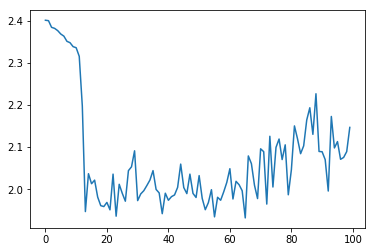

In [75]:
plt.figure()
plt.plot(all_losses)
plt.show()

In [76]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample(0, 8000)
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

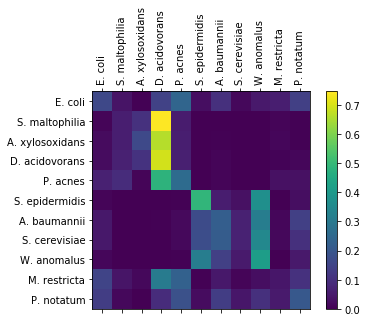

In [77]:
# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

In [78]:
def predict(input_line, n_predictions=3):
    #print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            #print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append(all_categories[category_index])
    
    return predictions

In [79]:
predictions = predict('ATATGATATC')
predictions

['P. notatum', 'E. coli', 'A. baumannii']

In [218]:
# Validation
accuracies = []
for species, reads in category_lines.items():
    correct = 0
    for read in reads[8000:]:
        predictions = predict(read)
        if species in predictions:
            correct += 1
    accuracy = correct/2000
    accuracies.append(accuracy)
print(mean(accuracies))

0.459090909091


In [255]:
# 5-fold cross validation
n_iters = 100000
n_hidden = 22
learning_rate = 0.005

accuracies = []
for k in range(5):
    rnn = RNN(n_letters, n_hidden, n_categories)
    criterion = nn.NLLLoss()
    
    # Train
    for iter in range(1, n_iters + 1):
        category, line, category_tensor, line_tensor = randomTrainingExample(k*2000, (k+1)*2000-1)
        train(category_tensor, line_tensor)
    
    # Validate
    for species, reads in category_lines.items():
        correct = 0
        for read in reads[k*2000:(k+1)*2000-1]:
            predictions = predict(read)
            if species in predictions:
                correct += 1
        accuracy = correct/200
        accuracies.append(accuracy)
    print('...finishing fold ' + str(k+1))
print(mean(accuracies))

...finishing fold 1
...finishing fold 2
...finishing fold 3
...finishing fold 4
...finishing fold 5
0.462272727273


In [ ]:
# Grid search
for kmer_length in ([3, 5, 8]):
    with open('k' + str(kmer_length) + '_summary.txt', 'w') as out_file:
        out_file.write('\t100\t125\t150\t175\t200\n')
        for read_length in ([10, 30, 50, 70, 90]):
            out_file.write(str(read_length))
            for n_hidden in ([100, 125, 150, 175, 200]):
                #read_length = 10
                category_lines['E. coli'] = make_reads(ec_file, read_length)
                category_lines['S. maltophilia'] = make_reads(sm_file, read_length)
                category_lines['A. xylosoxidans'] = make_reads(ax_file, read_length)
                category_lines['D. acidovorans'] = make_reads(da_file, read_length)
                category_lines['P. acnes'] = make_reads(pa_file, read_length)
                category_lines['S. epidermidis'] = make_reads(se_file, read_length)
                category_lines['A. baumannii'] = make_reads(ab_file, read_length)
                category_lines['S. cerevisiae'] = make_reads(sc_file, read_length)
                category_lines['W. anomalus'] = make_reads(wa_file, read_length)
                category_lines['M. restricta'] = make_reads(mr_file, read_length)
                category_lines['P. notatum'] = make_reads(pn_file, read_length)

                n_iters = 100000
                #n_hidden = 22
                learning_rate = 0.005
                criterion = nn.NLLLoss()

                accuracies = []
                for k in range(5):
                    rnn = RNN(n_dimensions, n_hidden, n_categories)

                    # Train
                    for iter in range(1, n_iters + 1):
                        category, line, category_tensor, line_tensor = randomTrainingExample(k*2000, (k+1)*2000-1)
                        train(category_tensor, line_tensor)

                    # Validate
                    for species, reads in category_lines.items():
                        correct = 0
                        for read in reads[k*2000:(k+1)*2000-1]:
                            predictions = predict(read)
                            if species in predictions:
                                correct += 1
                        accuracy = correct/2000.0
                        accuracies.append(accuracy)
                    #print('...finishing fold ' + str(k+1))
                print(str(count) + ': ' + str(np.mean(accuracies)))
                count += 1
                out_file.write('\t' + str(np.mean(accuracies)))
            out_file.write('\n')
